# TENSORBOARD로 모델, 데이터, 학습 시각화하기

학습이 진행 중일 때 학습이 잘 되고 있는지를 알아보기 위해 신경망 학습 내역을 시각화하는 도구인 TensorBoard 사용법을 알아보자.

이 튜토리얼에서는 다음의 내용들을 배웁니다:

0. (이전 튜토리얼과 거의 비슷하게) 데이터를 읽고 적절히 변환합니다.
1. TensorBoard를 설정(set up)합니다.
2. TensorBoard에 기록(write)합니다.
3. TensorBoard를 사용하여 모델 구조를 살펴봅니다.
4. 약간의 코드를 추가하여 TensorBoard에서 이전 튜토리얼에서 만든 시각화의 대화식(interactive) 버전을 만듭니다.

구체적으로 #5에서는 다음 내용들을 살펴보도록 하겠습니다:

- 학습 데이터를 검사(inspect)하는 몇 가지 방법
- 학습에 따른 모델의 성능을 추적(track)하는 방법
- 학습이 완료된 모델의 성능을 평가(assess)하는 방법

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/My Drive/수업/Info_Sys_2021/PyTorch

/content/drive/My Drive/수업/Info_Sys_2021/PyTorch


In [3]:
# imports
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# datasets
trainset = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=True,
    transform=transform)
testset = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=False,
    transform=transform)

# dataloaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                        shuffle=True, num_workers=2)


testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False, num_workers=2)

# 분류 결과를 위한 상수
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# 이미지를 보여주기 위한 헬퍼(helper) 함수
# (아래 `plot_classes_preds` 함수에서 사용)
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 1. TensorBoard 설정

이제 torch.utils 의 tensorboard 를 불러오고, TensorBoard에 정보를 제공(write)하는 SummaryWriter 를 주요한 객체인 SummaryWriter 를 정의하여 TensorBoard를 설정합니다.

In [6]:
from torch.utils.tensorboard import SummaryWriter

# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/fashion_mnist_experiment_1')

위 행(line)은 runs/fashion_mnist_experiment_1 폴더를 생성합니다.

### 2. TensorBoard에 기록하기

이제 TensorBoard에 이미지(구체적으로는 make_grid 를 사용하여 그리드(grid))를 써보겠습니다.

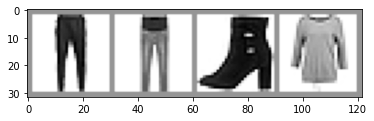

In [7]:
# 임의의 학습 이미지를 가져옵니다
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 그리드를 만듭니다.
img_grid = torchvision.utils.make_grid(images)

# 이미지를 보여줍니다.
matplotlib_imshow(img_grid, one_channel=True)

# tensorboard에 기록합니다.
writer.add_image('four_fashion_mnist_images', img_grid)



In [8]:
#!pip install tensorboard

이제 Anaconda Prompt 화면을 새로 열고 (기존 화면을 죽이면 안됨!!!)  runs 폴더의 path를 적어주는걸 주의하여 다음과 같이 입력한다.

tensorboard --logdir="C:\Users\NN\Google 드라이브\수업\Info_Sys_2021\PyTorch\runs"

새 탭에서 localhost:6006 을 입력후 엔터

TensorBoard는 대화형 시각화를 만드는데 특히 뛰어납니다. 다음에 그런 기능들 중 하나를 살펴보고, 튜토리얼의 나머지 부분에서 몇 가지 기능들을 더 살펴보겠습니다.

### 3. TensorBoard를 사용하여 모델 살펴보기(inspect)

TensorBoard의 강점 중 하나는 복잡한 모델 구조를 시각화하는 기능입니다. 지금까지 만든 모델을 시각화해보겠습니다.

In [9]:
writer.add_graph(net, images)
writer.close()

TensorBoard에서 새로고침(원형으로 돌아가는 화살표)하면 “Graphs” 탭이 추가로 나타난다.

“Graphs” 탭을 클릭하여 나타난 도형에서  “Net”을 더블클릭하여 펼쳐보면, 모델을 구성하는 개별 연산(operation)들에 대해 자세히 볼 수 있습니다.


### 4. TensorBoard에 “Projector” 추가하기

add_embedding 메소드(method)를 통해 고차원 데이터의 저차원 표현(representation)을 시각화할 수 있습니다.

In [12]:
import tensorflow as tf
import tensorboard as tb
tf.io.gfile = tb.compat.tensorflow_stub.io.gfile

In [13]:
# 헬퍼(helper) 함수
def select_n_random(data, labels, n=100):
    '''
    데이터셋에서 n개의 임의의 데이터포인트(datapoint)와 그에 해당하는 라벨을 선택합니다
    '''
    assert len(data) == len(labels)

    perm = torch.randperm(len(data))  #Returns a random permutation of integers from 0 to n - 1.
    return data[perm][:n], labels[perm][:n]

# 임의의 이미지들과 정답(target) 인덱스를 선택합니다
images, labels = select_n_random(trainset.data, trainset.targets)

# 각 이미지의 분류 라벨(class label)을 가져옵니다
class_labels = [classes[lab] for lab in labels]

# 임베딩(embedding) 내역을 기록합니다
features = images.view(-1, 28 * 28)
writer.add_embedding(features,
                    metadata=class_labels,
                    label_img=images.unsqueeze(1))
writer.close()

이제 TensorBoard의 밑줄 탭에서 “Projector” 를 선택하면 - 각각은 784 차원인 - 100개의 이미지가 3차원 공간에 투사(project)된 것을 볼 수 있습니다. 또한, 이것은 대화식입니다: 클릭하고 드래그(drag)하여 3차원으로 투영된 것을 회전할 수 있습니다. 마지막으로 시각화를 더 편히 볼 수 있는 몇 가지 팁이 있습니다: 좌측 상단에서 “Color by: label”을 선택하고, “야간모드(night mode)”를 활성화하면 이미지 배경이 흰색이 되어 더 편하게 볼 수 있습니다:

지금까지 데이터를 살펴보았으므로, 이제 학습 과정부터 시작하여 TensorBoard가 어떻게 모델 학습과 평가(evaluation)를 더 명확히 추적(track)할 수 있는지 살펴보겠습니다.

### 5. TensorBoard로 모델 학습 추적하기

이전 예제에서는 단순히 모델 학습 중 손실(running loss)을 100번 반복할 때마다 출력 하기만 했습니다. 이제 TensorBoard에 학습 중 손실을 기록하는 것 대신에 plot_classes_preds 함수를 통해 모델의 예측 결과를 함께 볼 수 있도록 하겠습니다.

In [14]:
# 헬퍼 함수

def images_to_probs(net, images):
    '''
    학습된 신경망과 이미지 목록으로부터 예측 결과 및 확률을 생성합니다
    '''
    output = net(images)
    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    preds = np.squeeze(preds_tensor.numpy())
    return preds, [F.softmax(el, dim=0)[i].item() for i, el in zip(preds, output)]


def plot_classes_preds(net, images, labels):
    '''
    학습된 신경망과 배치로부터 가져온 이미지 / 라벨을 사용하여 matplotlib
    Figure를 생성합니다. 이는 신경망의 예측 결과 / 확률과 함께 정답을 보여주며,
    예측 결과가 맞았는지 여부에 따라 색을 다르게 표시합니다. "images_to_probs"
    함수를 사용합니다.
    '''
    preds, probs = images_to_probs(net, images)
    # 배치에서 이미지를 가져와 예측 결과 / 정답과 함께 표시(plot)합니다
    fig = plt.figure(figsize=(12, 48))
    for idx in np.arange(4):
        ax = fig.add_subplot(1, 4, idx+1, xticks=[], yticks=[])
        matplotlib_imshow(images[idx], one_channel=True)
        ax.set_title("{0}, {1:.1f}%\n(label: {2})".format(
            classes[preds[idx]],
            probs[idx] * 100.0,
            classes[labels[idx]]),
                    color=("green" if preds[idx]==labels[idx].item() else "red"))
    return fig

마지막으로, 이전 튜토리얼과 동일한 모델 학습 코드에서 1000 배치마다 콘솔에 출력하는 대신에 TensorBoard에 결과를 기록하도록 하여 학습을 해보겠습니다; 이는 add_scalar 함수를 사용합니다.

또한, 학습을 진행하면서 배치에 포함된 4개의 이미지에 대한 모델의 예측 결과와 정답을 비교(versus)하여 보여주는 이미지를 생성하도록 하겠습니다.

In [15]:
running_loss = 0.0
for epoch in range(1):  # 데이터셋을 여러번 반복

    for i, data in enumerate(trainloader, 0):

        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data

        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 한 후
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 1000 == 999:    # 매 1000 미니배치마다...

            # ...학습 중 손실(running loss)을 기록하고
            writer.add_scalar('training loss',
                            running_loss / 1000,
                            epoch * len(trainloader) + i)

            # ...무작위 미니배치(mini-batch)에 대한 모델의 예측 결과를 보여주도록
            # Matplotlib Figure를 기록합니다
            writer.add_figure('predictions vs. actuals',
                            plot_classes_preds(net, inputs, labels),
                            global_step=epoch * len(trainloader) + i)
            running_loss = 0.0
print('Finished Training')

Finished Training


이제 ‘Scalars’ 탭에서 15,000번 반복 학습할 때의 손실을 확인할 수 있습니다:

또한, 학습 과정 전반에 걸쳐 임의의 배치에 대한 모델의 예측 결과를 확인할 수 있습니다. “Images” 탭에서 스크롤을 내려 “예측 vs. 정답(predictions vs. actuals)” 시각화 부분에서 이 내용을 볼 수 있습니다; 예를 들어 학습을 단지 3000번 반복하기만 해도, 신뢰도는 높진 않지만, 모델은 셔츠와 운동화(sneakers), 코트와 같은 분류들을 구분할 수 있었습니다:

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [ ]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [ ]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [ ]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [ ]:
# CNN Model
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.keep_prob = 0.5
        # L1 ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 32)
        #    Pool     -> (?, 14, 14, 32)
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        # L2 ImgIn shape=(?, 14, 14, 32)
        #    Conv      ->(?, 14, 14, 64)
        #    Pool      ->(?, 7, 7, 64)
        self.layer2 = torch.nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        # L3 ImgIn shape=(?, 7, 7, 64)
        #    Conv      ->(?, 7, 7, 128)
        #    Pool      ->(?, 4, 4, 128)
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        # L4 FC 4x4x128 inputs -> 625 outputs
        self.fc1 = nn.Linear(4 * 4 * 128, 625, bias=True)
        nn.init.xavier_uniform_(self.fc1.weight)
        self.layer4 = nn.Sequential(
            self.fc1,
            nn.ReLU(),
            nn.Dropout(p=1 - self.keep_prob))
        # L5 Final FC 625 inputs -> 10 outputs
        self.fc2 = nn.Linear(625, 10, bias=True)
        nn.init.xavier_uniform_(self.fc2.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        #print(out.shape)
        out = self.layer4(out)
        out = self.fc2(out)
        return out

In [ ]:
# instantiate CNN model
model = CNN().to(device)

### 비디오 lab-10-2 (30분 위치) model 확인하는 방법

In [ ]:
print(model)

모델에 training data를 넣어 돌리기 전에, 임의의 값을 넣어 테스트를 하는 것이 좋다.

In [ ]:
value=torch.Tensor(1,1,28,28)
print(model(value).shape)

위 셀에서 value=torch.Tensor(1,1,28,28).to(device)로 변경해서 GPU에서 돌아갈수 있도록 한다.




45번째 라인 # 제거한 다음, 그 셀부터 다시 실행한다. 

1152 가 나오는데, 이를 128 (30번째 라인 참조)로 나누면 9가 나온다. 
따라서, 30번째 라인 4\*4\*128 이 아니라 3\*3\*128 로 변경해야 한다.
즉 1152개의 출력셀을 3\*3\*128로 변환하여야 갯수가 일치한다.

45번째 라인을 코멘트 문으로 바꾸어야 한다.
그렇지 않으면 인쇄가 아주 많이 되어서 곤란해진다.

In [ ]:
pip install pytorch_model_summary

In [ ]:
import pytorch_model_summary
print(pytorch_model_summary.summary(model, torch.zeros(1, 1, 28, 28).to(device), show_input=False))

In [ ]:
# define cost/loss & optimizer
criterion = nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# train my model
total_batch = len(data_loader)
model.train()    # set the model to train mode (dropout=True)
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

print('Learning Finished!')

In [ ]:
# Test model and check accuracy
with torch.no_grad():
    model.eval()    # set the model to evaluation mode (dropout=False)

    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

In [ ]:
X.shape